DHBW Ravensburg - WWIDS119 - Machine Learning Project - Milan Wosel & Ngoc My Tran

# Dataset 2: Airbus Wind Turbines Patches

### Install and Import Libraries

In [1]:
# !pip install opendatasets

# !pip install pandas
# !pip install numpy
# !pip install tensorflow

# !pip install seaborn
# !pip install matplotlib

# !pip install pillow

In [13]:
import opendatasets as od
import os
import re
from PIL import Image

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras

from keras.applications.vgg16 import VGG16

import matplotlib.pyplot as plt
import seaborn as sns

### Download Dataset

In [2]:
# download the dataset from Kaggle
def downloadDataSet():
    url  = "https://www.kaggle.com/datasets/airbusgeo/airbus-wind-turbines-patches/download"
    path = "airbus-wind-turbines-patches"
    
    if os.path.exists(path):
        print("File already downloaded")
    else:
        od.download(url)
        print("File successfully downloaded")

In [3]:
def renameDirectory():
    path="airbus-wind-turbines-patches"
    
    if(os.path.exists(os.path.join(path, "train/windturbine"))):
        print("Folder already renamed")
    else:
        os.rename(os.path.join(path, "train/target"), os.path.join(path, "train/windturbine"))
        os.rename(os.path.join(path, "val/target"), os.path.join(path, "val/windturbine"))
        print("Folder successfully renamed")

In [4]:
downloadDataSet()
renameDirectory()

File already downloaded
Folder already renamed


### Load Dataset

#### Keras ImageLoader

In [ ]:
img_height = 128
img_width  = 128
batch_size = 15

In [5]:
def loadDataset():
    path_train = "airbus-wind-turbines-patches/train"
    path_val   = "airbus-wind-turbines-patches/val"
    return image_dataset_from_directory(path_train, batch_size=batch_size, image_size=(img_height, img_width)), image_dataset_from_directory(path_val, image_size=(img_height, img_width))

In [6]:
train_DS, val_DS = loadDataset()

Found 357507 files belonging to 2 classes.


2022-05-15 14:18:32.863501: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-15 14:18:37.723970: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9582 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:1c:00.0, compute capability: 7.5
2022-05-15 14:18:37.725720: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9646 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:1d:00.0, compute capability: 7.5
2022-05-15 14:18:37.727261: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/repli

Found 71504 files belonging to 2 classes.


In [7]:
class_names = train_DS.class_names
print(class_names)

['background', 'windturbine']


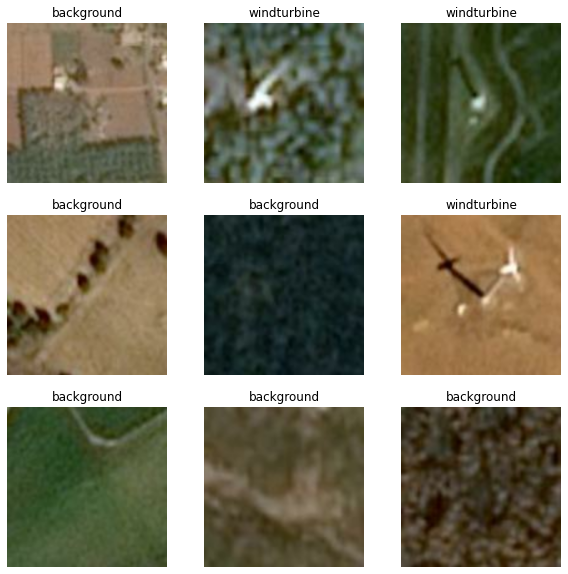

In [9]:
plt.figure(figsize=(10, 10))

for images, labels in train_DS.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Data Analysis

In [75]:
shape = None

for image_batch, labels_batch in train_DS:
    shape = image_batch.shape
    
    print(shape)
    print(labels_batch.shape)
    print(labels_batch.numpy())
    
    break
    
    print(shape)

(15, 128, 128, 3)
(15,)
[1 0 1 1 0 1 0 0 0 0 0 0 0 1 1]
(15, 128, 128, 3)


In [7]:
listImages = os.listdir("airbus-wind-turbines-patches/train/windturbine")
print(listImages[0])

aa9957d2-87cc-4b4c-b98e-cc7b6b745bb6.jpg


In [20]:
number_classes = {
    'Windturbine_TRAIN': len(os.listdir(os.path.join(p_train, p_target))),
    'Background_TRAIN' : len(os.listdir(os.path.join(p_train, p_background))),
    'Windturbine_EVAL' : len(os.listdir(os.path.join(p_eval, p_target))),
    'Background_EVAL'  : len(os.listdir(os.path.join(p_eval, p_background))),
}

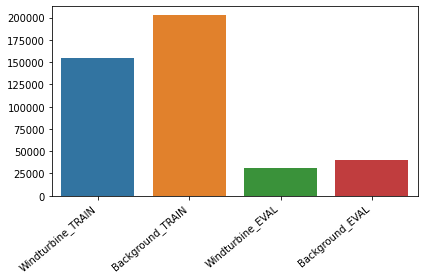

In [19]:
keys = list(number_classes.keys())
values = list(number_classes.values())

ax = sns.barplot(x=keys, y=values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### Data Preprocessing

Since all the images have the same format no normalization is needed.

### Data Augmentation

Data Augmentation is used to create create more data in order to get a better accuracy of the model. But since the dataset consists of a lot of images in different variation this techniques isn't necessary in this case.

## Train Modell

In [34]:
AUTOTUNE = tf.data.AUTOTUNE

train_DS = train_DS.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_DS = val_DS.cache().prefetch(buffer_size=AUTOTUNE)

In [82]:
print(shape[1:])
print(shape)

(128, 128, 3)
(15, 128, 128, 3)


### Create CNN

In [83]:
num_classes = len(class_names)

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=shape[1:]),
    layers.Dense(num_classes1)
])

In [45]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x200 with 3 bytes color
    # This is the first convolution
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),
    
    # The second convolution
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    # The third convolution
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    # # The fifth convolution
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('dandelions') and 1 for the other ('grass')
    tf.keras.layers.Dense(1, activation='sigmoid')])

In [55]:
# Let's build a CNN using Keras' Sequential capabilities
model_1 = Sequential([
    layers.add(Conv2D(32, (5,5), activation='relu', input_shape=(img_height, img_width,3)),
    layers.add(Conv2D(32, (5,5), strides = (2,2), activation ='relu')
    layers.add(MaxPooling2D(pool_size(2,2)), activation="relu")
    layers.add(Dropout(0.25))
    layers.add(Flatten())
    layers.add(Dense(512)
    layers.add(activation('relu')
    layers.add(Dropout(0.5)
    layers.add(Dense(num_classes), activation("softmax"))
])

model_1.summary()

SyntaxError: invalid syntax (433887058.py, line 6)

In [84]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 16, 16, 64)      

### Train Model

In [ ]:
epochs=10

history = model.fit(train_DS, validation_data=val_DS, epochs=epochs)

### Old Shit

In [ ]:
def create_dataset(path):
    images = []
    target = []
    imagePaths = []
    
    directory = os.listdir(path)
    
    for direc in directory:
        print(direc)
        
        for file in os.listdir(os.path.join(path, direc)):
            imagePath = os.path.join(path, direc, file)
            image = np.array(Image.open(os.path.join(path, direc, file)))
            images.append(image)
            
            if re.search("target", direc):
                target.append(1)
            else:
                target.append(0)
                
            imagePaths.append(imagePath)
            
    print("Done")

    return pd.DataFrame({'imagePaths':imagePaths, 'images':images, 'target':target}, columns=['imagePath', 'images', 'label'])

In [ ]:
dataset_train = create_dataset('C:/Users/milan/Documents/GitHub/Machine Learning Projects/Data/Wind-Turbine-Data/archive/train')
dataset_train.head()

dataset_eval = create_dataset("C:/Users/milan/Documents/GitHub/Machine Learning Projects/Data/Wind-Turbine-Data/archive/val")
dataset_eval.head()

### Transfer Learning

In [17]:
base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(128, 128, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

base_model.trainable = False

inputs = keras.Input(shape=(128, 128, 3))

# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)

# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)

# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)

model = keras.Model(inputs, outputs)

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

training = model.fit(train_DS, epochs=15, validation_data=val_DS)

Epoch 1/15
23834/23834 [==============================] - 419s 17ms/step - loss: 0.3342 - binary_accuracy: 0.9150 - val_loss: 0.2171 - val_binary_accuracy: 0.9360
Epoch 2/15
23834/23834 [==============================] - 416s 17ms/step - loss: 0.3091 - binary_accuracy: 0.9263 - val_loss: 0.2655 - val_binary_accuracy: 0.9277
Epoch 3/15
23834/23834 [==============================] - 416s 17ms/step - loss: 0.3115 - binary_accuracy: 0.9284 - val_loss: 0.3842 - val_binary_accuracy: 0.9120
Epoch 4/15
23834/23834 [==============================] - 416s 17ms/step - loss: 0.3129 - binary_accuracy: 0.9293 - val_loss: 0.4080 - val_binary_accuracy: 0.9165
Epoch 5/15
23834/23834 [==============================] - 418s 18ms/step - loss: 0.3138 - binary_accuracy: 0.9305 - val_loss: 0.2222 - val_binary_accuracy: 0.9467
Epoch 6/15
23834/23834 [==============================] - 415s 17ms/step - loss: 0.3174 - binary_accuracy: 0.9305 - val_loss: 0.2485 - val_binary_accuracy: 0.9432
Epoch 7/15
23834/23834

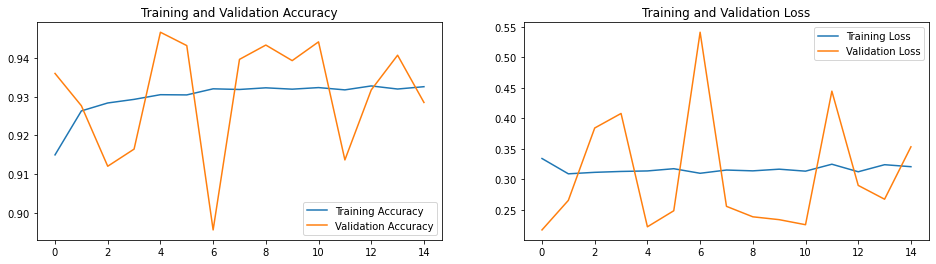

In [42]:
acc = training.history['binary_accuracy']
val_acc = training.history['val_binary_accuracy']

loss = training.history['loss']
val_loss = training.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
print(training.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


In [35]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

KeyError: 'acc'

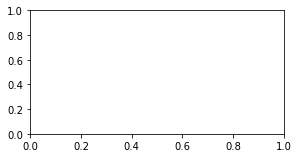

In [21]:
plot_accuracy_loss(training)

### Simple CNN Modell

In [30]:
model_simple = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (128, 128, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [31]:
model_simple.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model_simple.fit(train_DS, validation_data=val_DS, batch_size=128, epochs=15)

Epoch 1/15
23834/23834 [==============================] - 159s 7ms/step - loss: 0.2167 - accuracy: 0.9553 - val_loss: 0.0875 - val_accuracy: 0.9723
Epoch 2/15
23834/23834 [==============================] - 158s 7ms/step - loss: 0.0843 - accuracy: 0.9733 - val_loss: 0.0919 - val_accuracy: 0.9718
Epoch 3/15
23834/23834 [==============================] - 157s 7ms/step - loss: 0.0763 - accuracy: 0.9771 - val_loss: 0.1114 - val_accuracy: 0.9741
Epoch 4/15
23834/23834 [==============================] - 155s 7ms/step - loss: 0.0635 - accuracy: 0.9799 - val_loss: 0.0775 - val_accuracy: 0.9792
Epoch 5/15
23834/23834 [==============================] - 158s 7ms/step - loss: 0.0582 - accuracy: 0.9818 - val_loss: 0.0995 - val_accuracy: 0.9752
Epoch 6/15
23834/23834 [==============================] - 159s 7ms/step - loss: 0.0550 - accuracy: 0.9833 - val_loss: 0.1077 - val_accuracy: 0.9731
Epoch 7/15
23834/23834 [==============================] - 154s 6ms/step - loss: 0.0492 - accuracy: 0.9845 - val_

In [34]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


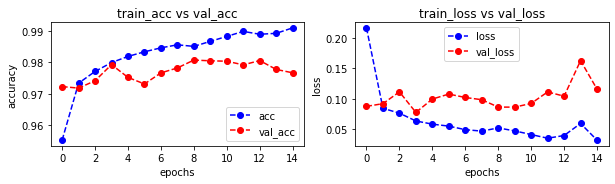

In [36]:
plot_accuracy_loss(history)